In [27]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [28]:
data

['t_n103        35.1044 (32.8085, 40.4985) (32.3990, 39.4830)  7.0840 (Jnode 202)\n',
 't_n104        33.8329 (30.0563, 39.2254) (29.7489, 38.8321)  9.0832 (Jnode 201)\n',
 't_n105        32.5129 (27.9095, 37.8527) (27.6829, 37.5910)  9.9081 (Jnode 200)\n',
 't_n106        28.3492 (23.1764, 33.7459) (22.9927, 33.5119) 10.5191 (Jnode 199)\n',
 't_n107        25.7993 (20.8717, 31.0296) (20.6421, 30.7501) 10.1080 (Jnode 198)\n',
 't_n108        25.2996 (20.4514, 30.4763) (20.2106, 30.1975)  9.9869 (Jnode 197)\n',
 't_n109        24.7024 (19.9089, 29.8342) (19.8084, 29.6962)  9.8879 (Jnode 196)\n',
 't_n110        24.2265 (19.4692, 29.3321) (19.2492, 29.0779)  9.8287 (Jnode 195)\n',
 't_n111        24.0651 (19.3158, 29.1661) (19.1243, 28.9354)  9.8111 (Jnode 194)\n',
 't_n112        14.9770 ( 9.9559, 20.6010) ( 9.7480, 20.3611) 10.6131 (Jnode 193)\n',
 't_n113        12.2874 ( 7.8330, 17.6790) ( 7.6140, 17.3755)  9.7615 (Jnode 192)\n',
 't_n114        10.8445 ( 6.7501, 16.0358) ( 6.4190, 1

In [29]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [30]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [31]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [32]:
posterior_mean_iqtree

[35.1044,
 33.8329,
 32.5129,
 28.3492,
 25.7993,
 25.2996,
 24.7024,
 24.2265,
 24.0651,
 14.977,
 12.2874,
 10.8445,
 7.702,
 6.4794,
 6.5515,
 8.8706,
 5.0404,
 18.5566,
 9.9844,
 13.4825,
 12.4498,
 5.2997,
 7.3169,
 17.9912,
 14.7996,
 8.9967,
 18.1676,
 11.5954,
 9.9383,
 7.6693,
 7.3869,
 3.5549,
 3.129,
 15.9673,
 20.8776,
 9.8014,
 20.4633,
 16.6316,
 14.18,
 11.306,
 8.699,
 8.4546,
 7.9718,
 5.6551,
 2.398,
 14.4249,
 8.0496,
 4.1025,
 2.1877,
 17.0748,
 8.0711,
 4.0824,
 6.3516,
 13.323,
 9.2769,
 9.4993,
 3.3097,
 20.3461,
 18.3597,
 15.7148,
 9.5825,
 4.9617,
 4.3584,
 0.6975,
 13.8199,
 10.2151,
 8.9261,
 33.8868,
 29.6868,
 25.9648,
 23.5052,
 20.6973,
 16.0929,
 14.0555,
 13.0026,
 7.806,
 5.2753,
 3.9811,
 11.6587,
 7.5997,
 2.709,
 6.0362,
 13.2819,
 8.6996,
 6.3513,
 3.6092,
 2.2634,
 8.2276,
 4.9805,
 3.9765,
 15.8947,
 8.84,
 8.0744,
 4.2033,
 1.0336,
 8.2204,
 16.7948,
 9.9612,
 4.2309,
 23.229,
 9.9442]

In [33]:
lower_ci_iqtree

[]

In [34]:
upper_ci_iqtree

[]

In [35]:
file_LG = open("LG_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [37]:
posterior_mean_baseml

[36.1715,
 10.8794,
 9.3678,
 7.7164,
 7.2252,
 6.1958,
 3.4456,
 3.3998,
 3.223,
 3.0417,
 2.8537,
 2.0816,
 0.8793,
 0.5052,
 1.0745,
 2.1262,
 1.6664,
 3.0118,
 2.8141,
 1.8041,
 1.4055,
 0.5257,
 1.1517,
 2.7324,
 2.4785,
 0.8283,
 3.1746,
 2.8016,
 1.8071,
 1.4889,
 1.7528,
 0.9072,
 0.6642,
 1.4501,
 5.5733,
 3.8715,
 6.4488,
 5.1918,
 3.772,
 2.9924,
 2.2534,
 2.0477,
 1.2249,
 0.5482,
 0.3916,
 4.6533,
 3.913,
 1.3616,
 0.4979,
 7.9923,
 6.2532,
 4.1311,
 1.9792,
 4.848,
 1.1164,
 3.1454,
 1.3899,
 10.0616,
 8.5317,
 5.8491,
 2.9195,
 2.4314,
 1.8839,
 1.1754,
 6.7014,
 3.2068,
 4.7711,
 8.4958,
 7.0848,
 6.3855,
 5.7993,
 5.0437,
 4.7636,
 4.457,
 4.127,
 3.6048,
 2.9461,
 1.7156,
 2.3926,
 1.3054,
 1.082,
 1.0932,
 4.0653,
 3.5372,
 3.2712,
 2.6298,
 1.3323,
 3.2434,
 2.5402,
 1.214,
 4.6845,
 4.1053,
 2.5134,
 2.2054,
 0.5416,
 1.9107,
 2.4738,
 1.856,
 0.7053,
 7.3113,
 2.9413]

In [38]:
posterior_mean_iqtree

[35.1044,
 33.8329,
 32.5129,
 28.3492,
 25.7993,
 25.2996,
 24.7024,
 24.2265,
 24.0651,
 14.977,
 12.2874,
 10.8445,
 7.702,
 6.4794,
 6.5515,
 8.8706,
 5.0404,
 18.5566,
 9.9844,
 13.4825,
 12.4498,
 5.2997,
 7.3169,
 17.9912,
 14.7996,
 8.9967,
 18.1676,
 11.5954,
 9.9383,
 7.6693,
 7.3869,
 3.5549,
 3.129,
 15.9673,
 20.8776,
 9.8014,
 20.4633,
 16.6316,
 14.18,
 11.306,
 8.699,
 8.4546,
 7.9718,
 5.6551,
 2.398,
 14.4249,
 8.0496,
 4.1025,
 2.1877,
 17.0748,
 8.0711,
 4.0824,
 6.3516,
 13.323,
 9.2769,
 9.4993,
 3.3097,
 20.3461,
 18.3597,
 15.7148,
 9.5825,
 4.9617,
 4.3584,
 0.6975,
 13.8199,
 10.2151,
 8.9261,
 33.8868,
 29.6868,
 25.9648,
 23.5052,
 20.6973,
 16.0929,
 14.0555,
 13.0026,
 7.806,
 5.2753,
 3.9811,
 11.6587,
 7.5997,
 2.709,
 6.0362,
 13.2819,
 8.6996,
 6.3513,
 3.6092,
 2.2634,
 8.2276,
 4.9805,
 3.9765,
 15.8947,
 8.84,
 8.0744,
 4.2033,
 1.0336,
 8.2204,
 16.7948,
 9.9612,
 4.2309,
 23.229,
 9.9442]

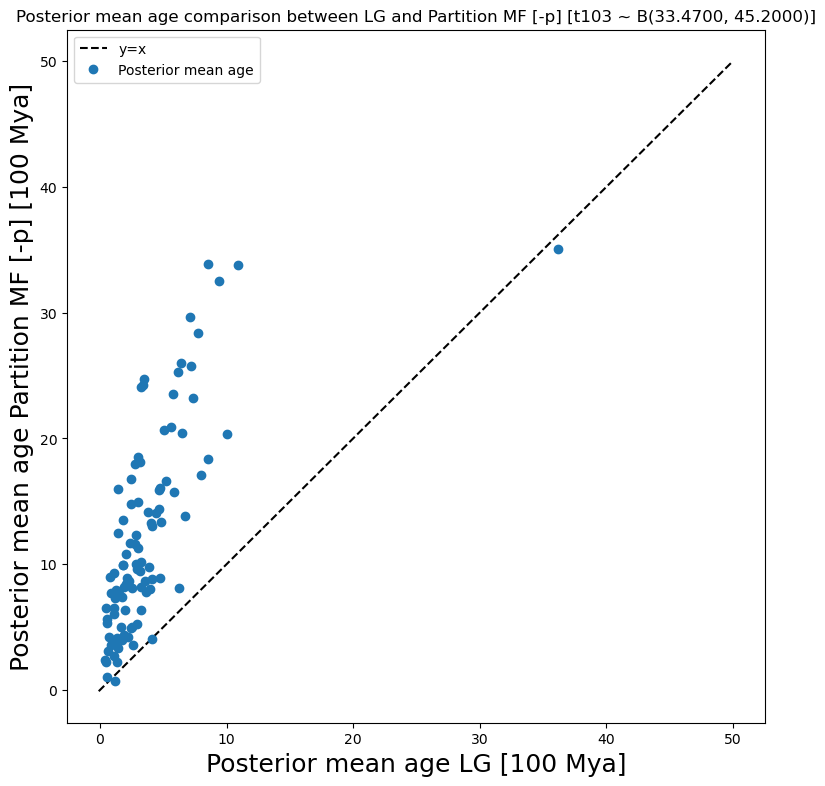

In [39]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t103 ~ B(33.4700, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_root_scatter.png')

In [40]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')